# Imports

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

# Constants

### Geometric Constants

In [2]:
l = 34 / 39.37                  # length of bat (m) 
r = 1.25 / 39.37                # radius of baseball bat (m)
F = 18000                       # force of ball on bat (N)

E1 = 26.2 * 10**9               # elastic modulus of aluminum (Pa)
E2 = 12.6 * 10**9               # elastic modulus of maple wood (Pa)
E3 = 228 * 10**9                # elastic modulus of carbon fiber (Pa)

rho1 = 2700                     # density of aluminum (kg/m^3)
rho2 = 630                      # density of maple wood (kg/m^3)
rho3 = 2000                     # density of carbon fiber (kg/m^3)

m1 = rho1 * l * np.pi * r**2    # mass of bat (kg)
m2 = rho2 * l * np.pi * r**2    # mass of bat (kg)
m3 = rho3 * l * np.pi * r**2    # mass of bat (kg)

### Approximation Constants

In [3]:
T1 = 0                     
T2 = 0.01
a = 0
b = l
n = 250

# Estimation Functions

In [4]:
def u_e(x, t, E, rho, m):
    """
    Returns the exact solution of the wave function 
    """
    k = E * (np.pi * r**2) / l               # spring constant (N/m)
    period = 2 * np.pi * (m / k)**(1/2)      # period (s)
    c = (E / rho)**(1/2)                     # wave speed (m/s)
    lamb = c / (1/period)                    # wavelength (m)
    
    amplitude = F / k                        # amplitude (ie: initial deformation) (m)
    waveNumber = 2 * np.pi / lamb            # wave number
    omega = 2 * np.pi * (1 / period)         # angular frequency
    damping = 2 * k**(1/2)                   # damping coefficient

    return amplitude * np.sin(waveNumber*x - omega*t - 0.5), c

In [5]:
def A_matrix(a, b, n, c):
    """
    Returns the A matrix
    """
    
    x = np.linspace(a, b, n+1)
    dx = x[1] - x[0]

    A = (c / dx)**2 * (np.eye(n-1, k=-1) - 2*np.eye(n-1) + np.eye(n-1, k=1))
    return A

In [6]:
def ivp_trap(a, b, T1, T2, n, u_0, c):
    """
    Returns the approximated solution matrix using the trapezoid method
    """
    A = A_matrix(a, b, n, c)
    t = np.linspace(T1, T2, n+1)
    dt = t[1] - t[0]

    u = np.zeros([len(t), len(u_0)])
    for i in range(len(t)):
        if i == 0:
            u[0] = u_0
        if i > 0:
            denom = np.eye(A.shape[0]) - 0.5 * dt * A
            numer = u[i-1] + 0.5*dt*A@u[i-1]
            u[i] = np.linalg.solve(denom, numer)
    return u

In [7]:
def trap_error(u, ut):
    """
    Returns the error between the approximate solution and the true solution 
    """  
    err = np.linalg.norm(u - ut) / np.linalg.norm(ut)
    return err

# Plotting Position v Time

In [8]:
x = np.linspace(a, b, n+1)[1:n]
t = np.linspace(T1, T2, n+1)[1:n]

# Aluminum
u_0_al, c_al = u_e(0, t, E1, rho1, m1)
u_al  = ivp_trap(a, b, T1, T2, n, u_0_al, c_al)
ut_al, c2 = u_e(x, t, E1, rho1, m1)

# Maple Wood
u_0_wood, c_wood = u_e(0, t, E2, rho2, m2)
u_wood = ivp_trap(a, b, T1, T2, n, u_0_wood, c_wood)
ut_wood, c2 = u_e(x, t, E2, rho2, m2)

# Carbon Fiber
u_0_cf, c_cf = u_e(0, t, E3, rho3, m3)
u_cf = ivp_trap(a, b, T1, T2, n, u_0_cf, c_cf)
ut_cf, c2 = u_e(x, t, E3, rho3, m3)

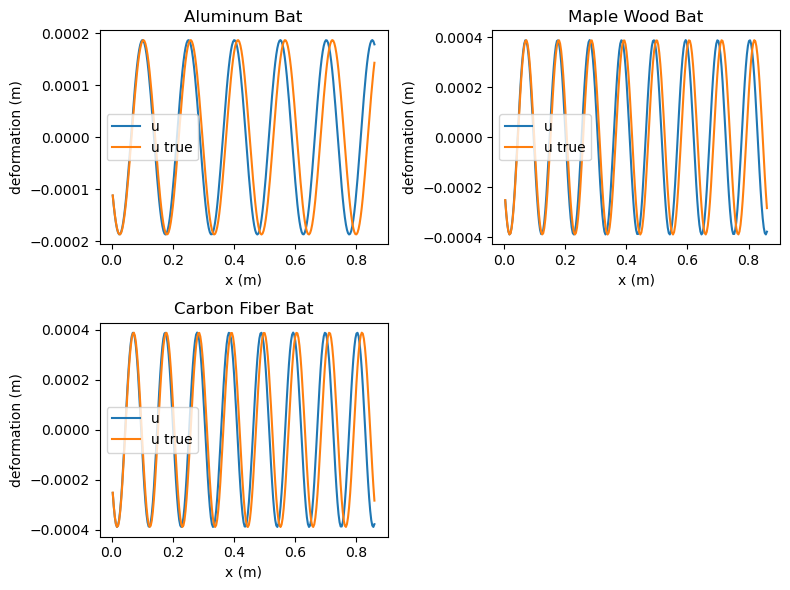

In [9]:
# plots
fig = plt.figure(figsize=(8, 6), tight_layout=True)

ax1 = fig.add_subplot(221)
ax1.plot(x, u_al[0], label = "u")
ax1.plot(x, ut_al, label = "u true")
plt.xlabel("x (m)")
plt.ylabel("deformation (m)")
plt.title("Aluminum Bat")
plt.legend()

ax1 = fig.add_subplot(222)
ax1.plot(x, u_wood[0], label = "u")
ax1.plot(x, ut_wood, label = "u true")
plt.xlabel("x (m)")
plt.ylabel("deformation (m)")
plt.title("Maple Wood Bat")
plt.legend()

ax1 = fig.add_subplot(223)
ax1.plot(x, u_wood[0], label = "u")
ax1.plot(x, ut_wood, label = "u true")
plt.xlabel("x (m)")
plt.ylabel("deformation (m)")
plt.title("Carbon Fiber Bat")
plt.legend()

# Plotting Error

In [10]:
# initializing lists
n_list = np.array([20, 40, 80, 160, 320])
dt_list = []
x_list = []
u_list = []
ut_list = []
err_list = []

# filling lists
for n in n_list:
    x = np.linspace(a, b, n+1)[1:n]
    t = np.linspace(T1, T2, n+1)[1:n]
    dt = t[1] - t[0]
    
    u_0_al, c_al = u_e(0, t, E1, rho1, m1)
    u_al  = ivp_trap(a, b, T1, T2, n, u_0_al, c_al)
    ut_al, c2 = u_e(x, t, E1, rho1, m1)
    
    x_list.append(x)
    dt_list.append(dt)
    u_list.append(u_al[0])
    ut_list.append(ut_al)
    err_list.append(trap_error(u_al[0], ut_al))

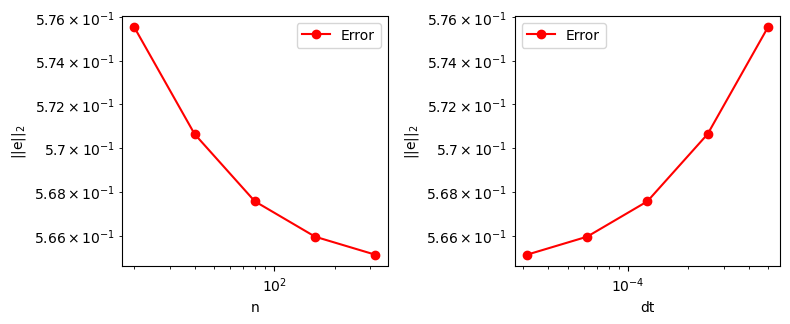

In [12]:
# plots
fig = plt.figure(figsize=(8, 6), tight_layout=True)

ax1 = fig.add_subplot(221)
ax1.plot(n_list, err_list, 'ro-', label = 'Error')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('||e||$_2$')
plt.legend()

ax1 = fig.add_subplot(222)
ax1.plot(dt_list, err_list, 'ro-', label = 'Error')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dt')
plt.ylabel('||e||$_2$')
plt.legend()